In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
url = "Chicago_Crime_Detective.csv"
cgdata = pd.read_csv(url, index_col=0, parse_dates=['Date'], dtype={"ID": int, "LocationDescription": object, "Arrest" : bool, "Domestic": bool, "Beat": int, "District": object,"CommunityArea":object, "Year":int })
cgdata.head(10)

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012
5,8950793,2012-12-31 20:30:00,STREET,True,False,2521,25,19,2012
6,8950760,2012-12-31 20:10:00,STREET,False,False,423,4,48,2012
7,8951611,2012-12-31 20:00:00,STREET,False,False,231,2,40,2012
8,8951802,2012-12-31 19:00:00,STREET,True,False,1021,10,29,2012
9,8950706,2012-12-31 18:00:00,STREET,False,False,1215,12,24,2012


In [3]:
print(cgdata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191641 entries, 0 to 191640
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   191641 non-null  int32         
 1   Date                 191641 non-null  datetime64[ns]
 2   LocationDescription  191641 non-null  object        
 3   Arrest               191641 non-null  bool          
 4   Domestic             191641 non-null  bool          
 5   Beat                 191641 non-null  int32         
 6   District             148589 non-null  object        
 7   CommunityArea        167038 non-null  object        
 8   Year                 191641 non-null  int32         
dtypes: bool(2), datetime64[ns](1), int32(3), object(3)
memory usage: 9.9+ MB
None


In [4]:
cgdata.dtypes

ID                              int32
Date                   datetime64[ns]
LocationDescription            object
Arrest                           bool
Domestic                         bool
Beat                            int32
District                       object
CommunityArea                  object
Year                            int32
dtype: object

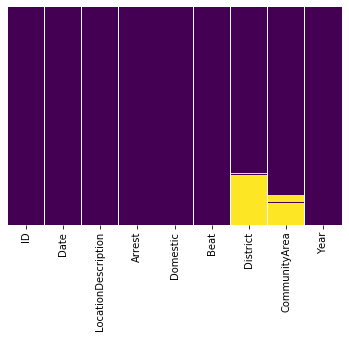

In [5]:
sns.heatmap(cgdata.isnull(),yticklabels=False,cbar=False,cmap='viridis')

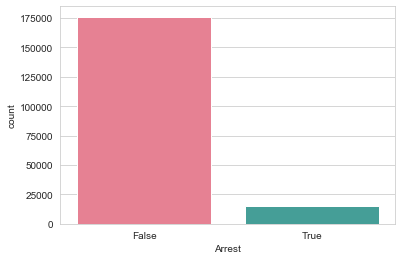

In [6]:
sns.set_style('whitegrid')
sns.countplot(x= 'Arrest',data=cgdata, palette= 'husl')

In [7]:
cgdata.LocationDescription.value_counts().head(6)

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

In [8]:
cgdata.Date.describe()

count                  191641
unique                 131680
top       2008-05-16 00:00:00
freq                       11
first     2001-01-01 00:01:00
last      2012-12-31 23:15:00
Name: Date, dtype: object

In [9]:
#Creating a  Month Column from Date
cgdata['Month-str-full'] = cgdata['Date'].dt.strftime('%B')
cgdata.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month-str-full
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,December
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,December
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,December
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,December
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,December


In [10]:
cgdata['Month-str-full'].value_counts()

October      17086
July         16801
August       16572
December     16426
November     16063
September    16060
January      16047
May          16035
June         16002
March        15758
April        15280
February     13511
Name: Month-str-full, dtype: int64

In [11]:
#Creating a Weekday Column from Date
cgdata['Weekday'] = cgdata['Date'].dt.strftime('%A')
cgdata.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month-str-full,Weekday
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,December,Monday
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,December,Monday
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,December,Monday
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,December,Monday
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,December,Monday


In [12]:
cgdata['Weekday'].describe()

count     191641
unique         7
top       Friday
freq       29284
Name: Weekday, dtype: object

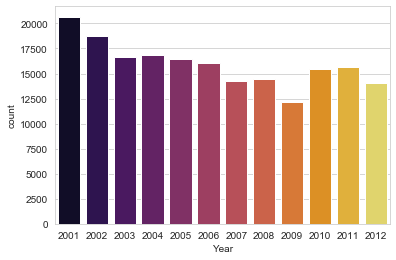

In [13]:
#Comparisions for Crimes vs Years
sns.countplot(x='Year', data=cgdata, palette='inferno')

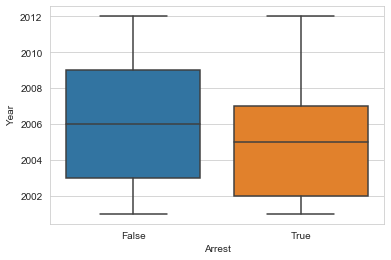

In [14]:
#Crimes for which were Arrest was Made vs Year
sns.boxplot(x='Arrest',y='Year', data=cgdata)

In [15]:
#Median Date
cgdata.Date.quantile(0.5)

Timestamp('2006-05-21 12:30:00')

In [16]:
cgdata.Arrest.value_counts()

False    176105
True      15536
Name: Arrest, dtype: int64

In [17]:
cgdata.groupby(['Arrest','Year']).size()

Arrest  Year
False   2001    18517
        2002    16638
        2003    14859
        2004    15169
        2005    14956
        2006    14796
        2007    13068
        2008    13425
        2009    11327
        2010    14796
        2011    15012
        2012    13542
True    2001     2152
        2002     2115
        2003     1798
        2004     1693
        2005     1528
        2006     1302
        2007     1212
        2008     1020
        2009      840
        2010      701
        2011      625
        2012      550
dtype: int64

In [18]:
#Proportion for which Arrests were made in 2001
t01 = cgdata['Year'][cgdata['Arrest'] == True ][cgdata['Year'] == 2001].count()
f01 = cgdata['Year'][cgdata['Arrest'] == False ][cgdata['Year'] == 2001].count()
print(round(t01/(t01+f01) , 2))

0.1


In [19]:
#Proportion for which Arrests were made in 2007
t07 = cgdata['Year'][cgdata['Arrest'] == True ][cgdata['Year'] == 2007].count()
f07 = cgdata['Year'][cgdata['Arrest'] == False ][cgdata['Year'] == 2007].count()
print(round(t07/(t07+f07) , 2))

0.08


In [20]:
#Total Number of Rows in Top5
Top5 = cgdata[(cgdata.LocationDescription == 'STREET') | (cgdata.LocationDescription == 'ALLEY') | (cgdata.LocationDescription == 'GAS STATION') | (cgdata.LocationDescription == 'DRIVEWAY - RESIDENTIAL') | (cgdata.LocationDescription == 'PARKING LOT/GARAGE(NON.RESID.)')]
print(Top5.shape[0])

177510


In [21]:
cgdata['Month-str-full'][cgdata['Arrest'] == True ].value_counts()

January      1435
December     1397
October      1342
August       1329
July         1324
March        1298
November     1256
April        1252
September    1248
February     1238
June         1230
May          1187
Name: Month-str-full, dtype: int64

In [22]:
cgdata['Weekday'][cgdata['LocationDescription'] == 'GAS STATION' ].value_counts()

Saturday     338
Sunday       336
Friday       332
Thursday     282
Monday       280
Wednesday    273
Tuesday      270
Name: Weekday, dtype: int64

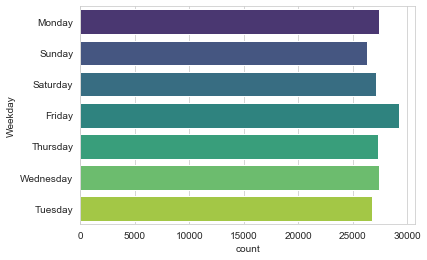

In [23]:
sns.set_style('whitegrid')
sns.countplot(y= 'Weekday', data= cgdata,palette='viridis')

In [28]:
#Function to find Proportion of arrests made in all the years for Motor Vehicle Thefts:
def year_function(y) :
    t = cgdata['Year'][cgdata['Arrest'] == True ][cgdata['Year'] == y].count()
    f = cgdata['Year'][cgdata['Arrest'] == False ][cgdata['Year'] == y].count()
    return(round(t/(t+f) , 2))
    
i = 2001
while(i<2013):
    print("Proportion of motor vehicle thefts in " + str(i) + " as an arrest made :" + str(year_function(i)) )
    i += 1 


Proportion of motor vehicle thefts in 2001 as an arrest made :0.1
Proportion of motor vehicle thefts in 2002 as an arrest made :0.11
Proportion of motor vehicle thefts in 2003 as an arrest made :0.11
Proportion of motor vehicle thefts in 2004 as an arrest made :0.1
Proportion of motor vehicle thefts in 2005 as an arrest made :0.09
Proportion of motor vehicle thefts in 2006 as an arrest made :0.08
Proportion of motor vehicle thefts in 2007 as an arrest made :0.08
Proportion of motor vehicle thefts in 2008 as an arrest made :0.07
Proportion of motor vehicle thefts in 2009 as an arrest made :0.07
Proportion of motor vehicle thefts in 2010 as an arrest made :0.05
Proportion of motor vehicle thefts in 2011 as an arrest made :0.04
Proportion of motor vehicle thefts in 2012 as an arrest made :0.04


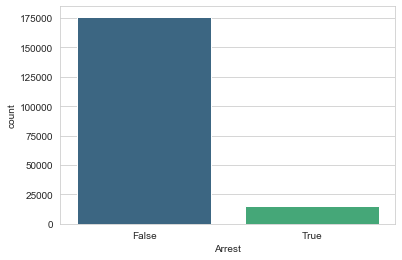

In [39]:
sns.set_style('whitegrid')
sns.countplot(x = 'Arrest', data= cgdata,palette='viridis')

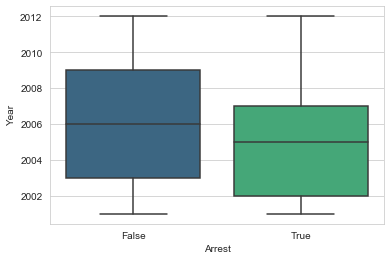

In [38]:
sns.set_style('whitegrid')
sns.boxplot(x = 'Arrest', y ='Year', data= cgdata ,palette='viridis')

In [43]:
cgdata.dtypes

ID                              int32
Date                   datetime64[ns]
LocationDescription            object
Arrest                           bool
Domestic                         bool
Beat                            int32
District                       object
CommunityArea                  object
Year                            int32
Month-str-full                 object
Weekday                        object
dtype: object